In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

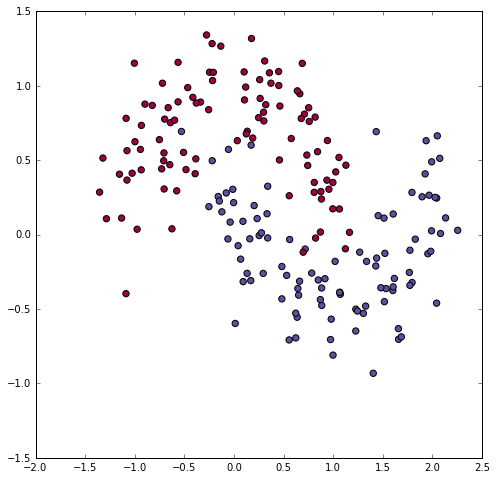

In [183]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
X = X.astype(np.float32)

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [184]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [185]:
def predict(W1, b1, W2, b2, x):
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exps = np.exp(z2)
    probs = exps / np.sum(exps, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [181]:
def compute_loss(W1, b1, W2, b2, X, y, reg_lambda):
    N = X.shape[0]
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exps = np.exp(z2)
    probs = exps / np.sum(exps, axis=1, keepdims=True)
    logprobs = -np.log(probs[range(N), y])
    loss = np.sum(logprobs)
    loss += 0.5 * reg_lambda * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss /= N
    return loss

In [195]:
def train_model(X, y, num_hidden=100, num_output=2, num_iters=20000, learning_rate=0.01, reg_lambda=0.01):
    N = X.shape[0]
    num_input = X.shape[1]
    np.random.seed(0)
    W1 = np.random.randn(num_input, num_hidden).astype(np.float32) / np.sqrt(num_input).astype(np.float32)
    b1 = np.zeros((1, num_hidden)).astype(np.float32)
    W2 = np.random.randn(num_hidden, num_output).astype(np.float32) / np.sqrt(num_hidden).astype(np.float32)
    b2 = np.zeros((1, num_output)).astype(np.float32)
    
    for it in range(num_iters):
        # forward
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exps = np.exp(z2)
        probs = exps / np.sum(exps, axis=1, keepdims=True)
        
        # backward
        delta3 = probs.copy()
        delta3[range(N), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # regularization
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # update    
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        if it % 1000 == 0:
            print 'it', it, 'loss', compute_loss(W1, b1, W2, b2, X, y, reg_lambda)
            
    return W1, b1, W2, b2

In [196]:
W1, b1, W2, b2 = train_model(X, y)

it 0 loss 3.33763872032
it 1000 loss 0.0559173717499
it 2000 loss 0.0515493371964
it 3000 loss 0.0490342960358
it 4000 loss 0.0449964165688
it 5000 loss 0.0414302099228
it 6000 loss 0.0395207626343
it 7000 loss 0.0382450543404
it 8000 loss 0.0373208080292
it 9000 loss 0.0366107087135
it 10000 loss 0.0360105800629
it 11000 loss 0.0354535330772
it 12000 loss 0.0349886816502
it 13000 loss 0.0345342564583
it 14000 loss 0.034084442234
it 15000 loss 0.0336699708462
it 16000 loss 0.0333066679955
it 17000 loss 0.0329947798252
it 18000 loss 0.032726786232
it 19000 loss 0.0324934732914


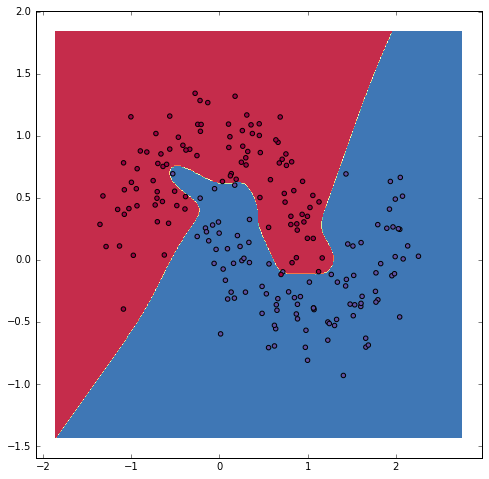

In [190]:
plot_decision_boundary(lambda x: predict(W1, b1, W2, b2, x))